In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G2=nx.complete_graph(3)

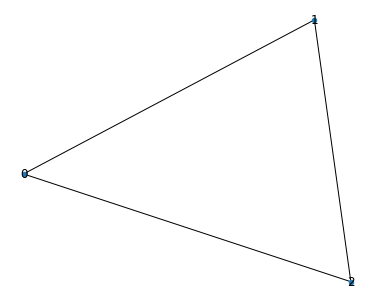

In [3]:
fig = plt.figure(figsize=(5,4))
nx.draw_spring(G2, node_size=20, with_labels = True)

In [4]:
G = nx.Graph()

In [5]:
G.add_nodes_from([0,1,2,3,4])

In [6]:
print(G.nodes(data=True))

[(0, {}), (1, {}), (2, {}), (3, {}), (4, {})]


In [7]:
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(0, 3)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(4, 0)
G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)
G.nodes()
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [8]:
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

G has 5 nodes and 10 edges.


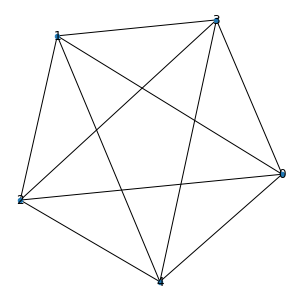

In [9]:
fig = plt.figure(figsize=(4,4))
nx.draw_spring(G, node_size=20, with_labels = True)


In [13]:
G3=nx.barabasi_albert_graph(100,2)

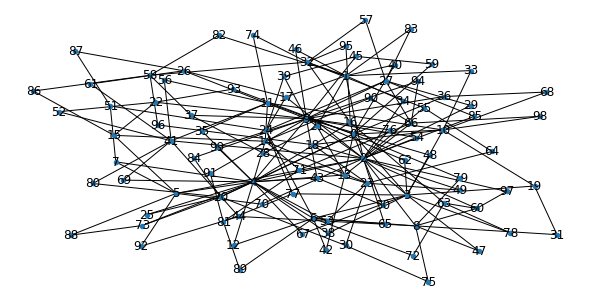

In [14]:
fig = plt.figure(figsize=(8,4))
nx.draw_spring(G3, node_size=20, with_labels = True)

In [15]:
nx.write_gexf(G3, "BA_graph_1000.gexf")

In [21]:
m=4
n=100
seed=None
if seed is not None:
    random.seed(seed)
G.name="mygraph(%s,%s)"%(n,m)
# Target nodes for new edges
targets=list(range(m))
# List of existing nodes, with nodes repeated once for each adjacent edge
repeated_nodes=[]
# Start adding the other n-m nodes. The first node is m.
source=m

In [22]:
while source<n:
    # Add edges to m nodes from the source.
    G.add_edges_from(zip([source]*m,targets))
    # Add one node to the list for each new edge just created.
    repeated_nodes.extend(targets)
    # And the new node "source" has m edges to add to the list.
    repeated_nodes.extend([source]*m)
    # Now choose m unique nodes from the existing nodes
    # Pick uniformly from repeated_nodes (preferential attachement)
    targets = _random_subset(repeated_nodes,m)
    source += 1

In [23]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  100
Number of edges:  390

Average degree:  7.8
Average degree (alternate calculation) 7.8

Minimum degree:  4
Maximum degree:  28


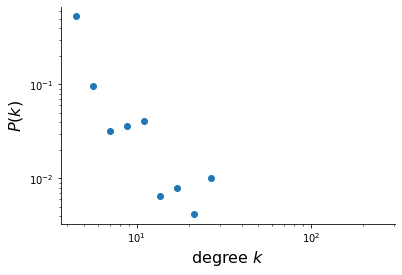

In [26]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [29]:
m=4
n=1000
seed=None
if seed is not None:
    random.seed(seed)
G.name="mygraph(%s,%s)"%(n,m)
# Target nodes for new edges
targets=list(range(m))
# List of existing nodes, with nodes repeated once for each adjacent edge
repeated_nodes=[]
# Start adding the other n-m nodes. The first node is m.
source=m
while source<n:
    # Add edges to m nodes from the source.
    G.add_edges_from(zip([source]*m,targets))
    # Add one node to the list for each new edge just created.
    repeated_nodes.extend(targets)
    # And the new node "source" has m edges to add to the list.
    repeated_nodes.extend([source]*m)
    # Now choose m unique nodes from the existing nodes
    # Pick uniformly from repeated_nodes (preferential attachement)
    targets = _random_subset(repeated_nodes,m)
    source += 1

In [30]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  1000
Number of edges:  4595

Average degree:  9.19
Average degree (alternate calculation) 9.19

Minimum degree:  4
Maximum degree:  158


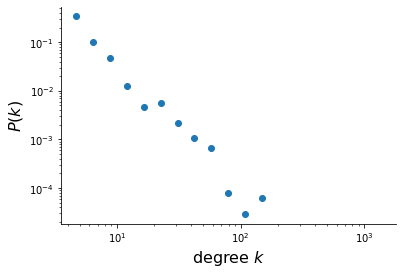

In [31]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [32]:
m=4
n=10000
seed=None
if seed is not None:
    random.seed(seed)
G.name="mygraph(%s,%s)"%(n,m)
# Target nodes for new edges
targets=list(range(m))
# List of existing nodes, with nodes repeated once for each adjacent edge
repeated_nodes=[]
# Start adding the other n-m nodes. The first node is m.
source=m
while source<n:
    # Add edges to m nodes from the source.
    G.add_edges_from(zip([source]*m,targets))
    # Add one node to the list for each new edge just created.
    repeated_nodes.extend(targets)
    # And the new node "source" has m edges to add to the list.
    repeated_nodes.extend([source]*m)
    # Now choose m unique nodes from the existing nodes
    # Pick uniformly from repeated_nodes (preferential attachement)
    targets = _random_subset(repeated_nodes,m)
    source += 1
    
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  10000
Number of edges:  44377

Average degree:  8.8754
Average degree (alternate calculation) 8.8754

Minimum degree:  4
Maximum degree:  453


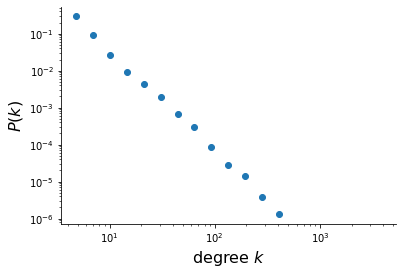

In [33]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()